# 선형회귀(Linear Regression)
- knn 최근접 이웃 회귀: 사례기반(데이터) 학습
- 선형회귀: 모델 기반 학습
- 선형회귀는 널리 사용되는 대표적인 회귀 알고리즘
- 비교적 간단하고 성능이 뛰어나기 떄문에 맨 처음 배우는 머신러닝 알고리즘 중 하나

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split
# test_size: 25% default
# 하나의 배열의 값이 두 개의 배열의 값으로 분할된다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
# 선형회귀 알고리즘
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 모델학습
lr.fit(train_input, train_target)

# 50cm 생선의 무게 예측
# 회귀방정식 y = aX + b
print(lr.predict([[50]]))
# a, b
print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


In [ ]:
# 결정계수
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


- 과대적합
- 훈련데이터의 성능이 뛰어난 반면 테스트 데이터의 성능이 떨어진다.

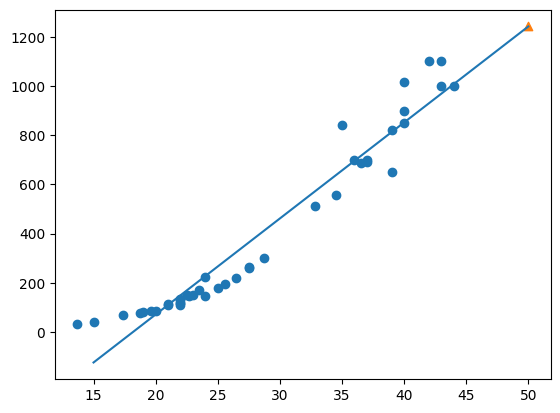

In [ ]:
# 훈련세트의 산점도 그래프
plt.scatter(train_input, train_target)

# 선형 회귀선
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.xlabel = 'length'
plt.ylabel = 'weight'
plt.show()

In [ ]:
print(lr.score(train_input, train_target)) # 훈련셋
print(lr.score(test_input, test_target)) # 테스트셋

0.939846333997604
0.8247503123313558


- 최적의 직선이 아닌 최적의 곡선을 찾아내는 다항회귀를 구현해야한다.
- 다항회귀식: y = ax^2 + bx + c
- 다항회귀를 구현하기 위해 길이에 제곱한 항이 하나 필요하다.

In [ ]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [ ]:
train_poly.shape

(42, 2)

In [ ]:
# train_poly를 이용한 선형회귀 모델
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.predict([[50 ** 2, 50]])

array([1573.98423528])

In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


- 무게 = 1.01*길이제곱 - 21.6*길이 + 116.0

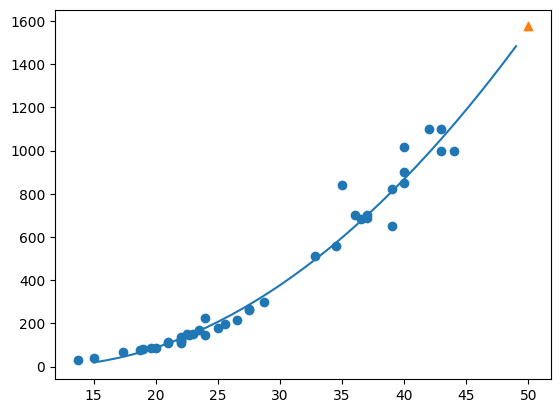

In [ ]:
# 곡선을 표현하기 위해 작은 선들을 이어 붙이는 작업을 수행
point = np.arange(15, 50)
# 훈련세트의 산점도 그래프
plt.scatter(train_input, train_target)

# 선형 회귀선
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50, 1574, marker='^')
plt.xlabel = 'length'
plt.ylabel = 'weight'
plt.show()

In [ ]:
# 결정계수
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 다중회귀
- 다중회귀란 여러 개의 특성(독립변수)을 사용한 선형 회귀
- 1개의 특성은 직선, 2개의 특성 평면을 통해 학습
- 특성이 많다면 매우 복잡한 모델로 표현될 가능성이 높다.

# 특성공학과 규제
**특성공학**
- 각각의 특성을 제곱하고, 특성끼리 곱하는 등 기존의 특성으로 새로운 특성을 뽑아내는 작업

**차원축소(PCA)**
- 너무 많은 특성을 가진 데이터 셋을 이용하여 분석이 어려울 경우 중요한 특성을 이용하여 분석하는 주성분 분석과 함께 사용되며, 특성을 축약해 데이터를 분석하는 것

## 데이터 준비
- 데이터: 'https://bit.ly/perch_csv'

In [ ]:
df = pd.read_csv('https://bit.ly/perch_csv')
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [ ]:
raw = df.to_numpy()
raw

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

- 생선의 길이, 높이, 두께를 이용한 회귀분석

In [ ]:
# target data
weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])
weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [ ]:
weight.shape

(56,)

# train / test 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(raw, weight, random_state = 42)

**사이킷런 변환기**
- 변환기(transform)
- 일반적인 머신러닝 알고리즘은 fit(), predict(), score()
- 전처리용으로 사용하는 특성공학과 관련된 알고리즘 fit(), transform()

In [ ]:
# 다항식 변환기
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures: 현재 데이터를 다항식의 형태로 변경하는 역할을 수행하는 객체

In [ ]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias = False)  # 1을 뺀 값

# fit_transform()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


**회귀방정식**
- y = aX + b

**다중회귀방정식**
- a:길이, b:높이, c:두께
- y = w1x1 + w2x2 + w3x3 + 1  (1은 절편)

In [ ]:
raw.shape

(56, 3)

In [ ]:
train_input.shape

(42, 3)

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

train_poly.shape

(42, 9)

- a, b, c
- a*a, b*b, c*c, a*b, b*c, a*c

In [ ]:
# 특성공학을 통해 추출된 특성의 생성내용을 확인할 수 있다.
## 컬럼명 추출: get_feature_names_out()
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = poly.transform(test_input)

# 다중회귀모델

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(test_poly, test_target)

0.9714559911594111

In [ ]:
lr.score(train_poly, train_target)

0.9903183436982125

- 훈련데이터의 평가 점수가 테스트 데이터보다 높다. 즉, 과대적합이 발생되었다.

In [ ]:
# degree(제곱수) 옵션을 통해 특성의 객체에 3제곱, 4제곱 등을 수행할 수 있다.
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)

LinearRegression()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


- 특성의 개수가 늘어나면 선형회귀모델은 강력해진다. 하지만 너무 많은 특성은 과대적합을 불러온다.
- 따라서 규제가 필요하다.
- 규제: 머신러닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 하는 것
- 선형회귀모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이다.

**선형회귀 모델의 과대적합(Overfitting)을 해결하는 방법**
- 특성(feature)의 계수를 줄인다.
- 정규화(Regulation, 규제)를 수행한다.

**선형회귀 모델의 규제를 제약하는 모델**
- 릿지 회귀(Ridge Regression)모델: 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘 회귀(Lasso Regression)모델: 계수의 절댓값을 기준으로 규제 적용
- 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있어서 일반적으로 릿지 더 선호한다.
- alpha: 릿지와 라쏘 모델을 사용할 떄 규제의 양을 임의로 조절하는 하이퍼파라미터
- alpha 값이 크면 규제 강도가 높아지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.
- 하이퍼파라미터(Hyperparameter): 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터

In [ ]:
# 평균과 표준편차를 이용하여 특성의 스케일을 표준점수로 변경
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지회귀
 - 계수(기울기, 가중치)를 제곱한 값(알파, alpha)을 기준으로 규제를 적용하는 모델
 - L2규제
 - 모델의 복잡도를 alpha 값으로

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [ ]:
# 최적의 alpha 값을 찾는 작업
# 훈련 세트와 테스트 세트의 평가 점수가 가장 가까운 지점이 최적의 alpha가 된다.

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for a in alpha_list:
  # 릿지 모델
  ridge = Ridge(alpha = a)
  # 훈련
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

TypeError: ignored

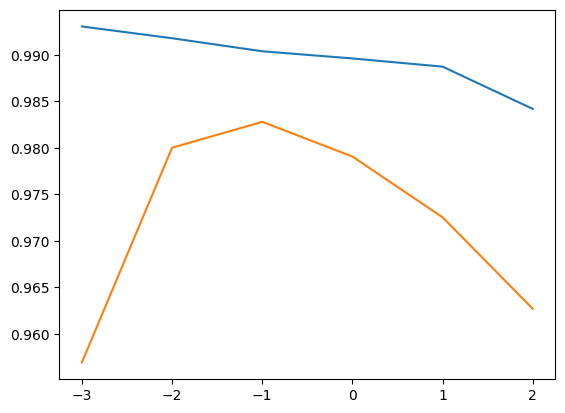

In [ ]:
# 훈련세트의 결정계수
plt.plot(np.log10(alpha_list), train_score, label = 'train')
# 테스트세트의 결정계수
plt.plot(np.log10(alpha_list), test_score, label = 'test')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend()
plt.show()


# Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [ ]:
# 최적의 alpha 값을 찾는 작업
# 훈련 세트와 테스트 세트의 평가 점수가 가장 가까운 지점이 최적의 alpha가 된다.

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for a in alpha_list:
  # 라쏘 모델
  lasso = Lasso(alpha = a)
  # 훈련
  lasso.fit(train_scaled, train_target)
  # 결정계수
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

In [ ]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


# 확인학습
**당뇨병 진행 예측**

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
# diabetes.keys()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [ ]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
diabetes.target_filename

'diabetes_target.csv.gz'

# 보스톤 집값 예측

In [ ]:
X, y